In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import plotly.express as px

df_athlete_events = pd.read_csv(filepath_or_buffer="data/athlete_events.csv")
df_noc_regions = pd.read_csv(filepath_or_buffer="data/noc_regions.csv")
df_merge = pd.merge(df_athlete_events, df_noc_regions, how= "inner", on="NOC")
df_merge.info()





ModuleNotFoundError: No module named 'plotly'

<Axes: xlabel='Medal', ylabel='region'>

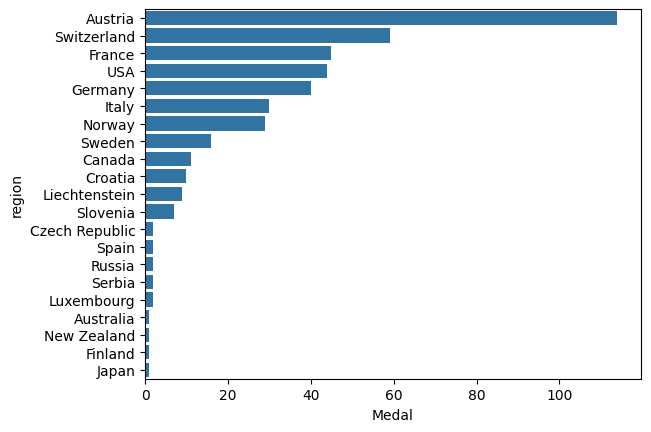

In [ ]:
# Medalfördelning mellan länderna
df_AlpineSkiing = df_merge[df_merge["Sport"] == "Alpine Skiing"] # Selekterar rad som innehåller "Alpine Skiing" via maskning
df_AlpineSkiing = df_AlpineSkiing.dropna(subset="Medal")


df_AlpineSkiing_MedalsPerCountry = df_AlpineSkiing.groupby(by="region")["Medal"].count()
df_AlpineSkiing_MedalsPerCountry_sorted = df_AlpineSkiing_MedalsPerCountry.sort_values(ascending=False).head(25).reset_index()
df_AlpineSkiing_MedalsPerCountry_sorted
sns.barplot(df_AlpineSkiing_MedalsPerCountry_sorted, x="Medal", y="region")


In [20]:
# Åldersfördelning mellan sporterna
df_AlpineSkiing.Age.describe()

count    428.000000
mean      24.343458
std        3.744320
min       16.000000
25%       22.000000
50%       24.000000
75%       27.000000
max       36.000000
Name: Age, dtype: float64